<a href="https://colab.research.google.com/github/MaggieNjenga/WhirlwindTourOfPython/blob/master/Car_Price_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA UNDERSTANDING AND EXPLORATION##

## Data Understanding ##

Import Packages and Set up Environment for EDA

In [1]:
#import the libraries necessary for EDA
import pandas as pd
#import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load cleaned data that does not contain missing values and outliers have been trimmed
df = pd.read_csv("/content/adverts_cleaned.csv")
df.head()

,mileage,reg_code,colour,condition,year,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
0,0.0,54.0,Grey,NEW,2016.0,73970,SUV,False,Petrol Plug-in Hybrid,High,Volvo_XC90,4.0
1,108230.0,61.0,Blue,USED,2011.0,7000,Saloon,False,Diesel,Low,Jaguar_XF,9.0
2,7800.0,17.0,Grey,USED,2017.0,14000,SUV,False,Petrol,Medium,SKODA_Yeti,3.0
3,45000.0,16.0,Brown,USED,2016.0,7995,Hatchback,False,Diesel,Low,Vauxhall_Mokka,4.0
4,64000.0,64.0,Grey,USED,2015.0,26995,SUV,False,Diesel,High,Land Rover_Range Rover Sport,5.0


Inspect data

In [3]:
#the shape of the clean data
df.shape
# The data contains 394,887 rows and 12 columns

(394887, 12)

In [4]:
#all the columns of the dataset
df.columns

Index(['mileage', 'reg_code', 'colour', 'condition', 'year', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'price_category',
       'make_model', 'age'],
      dtype='object')

Summarize data

In [5]:
#checking data types of features and confirming there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394887 entries, 0 to 394886
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                394887 non-null  float64
 1   reg_code               394887 non-null  float64
 2   colour                 394887 non-null  object 
 3   condition              394887 non-null  object 
 4   year                   394887 non-null  float64
 5   price                  394887 non-null  int64  
 6   body_type              394887 non-null  object 
 7   crossover_car_and_van  394887 non-null  bool   
 8   fuel_type              394887 non-null  object 
 9   price_category         394887 non-null  object 
 10  make_model             394887 non-null  object 
 11  age                    394887 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 33.5+ MB


In [6]:
#summarizing numerical variables
df.describe()

,mileage,reg_code,year,price,age
count,394887.000000,394887.000000,394887.000000,3.948870e+05,394887.000000
mean,37820.231117,41.552138,2015.147310,1.691919e+04,4.852690
std,34559.300194,24.409297,4.106734,2.100000e+04,4.106734
min,0.000000,2.000000,1950.000000,1.200000e+02,0.000000
25%,10743.000000,17.000000,2014.000000,7.495000e+03,2.000000
50%,28802.000000,54.000000,2016.000000,1.250000e+04,4.000000
75%,56888.000000,66.000000,2018.000000,1.999500e+04,6.000000
max,388000.000000,95.000000,2020.000000,1.590000e+06,70.000000


In [7]:
#drop reg_code and year since age captures the same information as year
#there is no trend in car registration years hence no need to keep it
#reg_code does not add any more information beyond year of registration
df = df.drop(['reg_code', 'year'], axis = 1)

In [8]:
# identifying categorical variables
categorical = df.select_dtypes(include=['bool', 'object']).columns
categorical

Index(['colour', 'condition', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'price_category', 'make_model'],
      dtype='object')

In [9]:
#summarizing categorical variables
for col in categorical:
    print(f'Value Counts for {col}:')
    print(df[col].value_counts())
    print('')

Value Counts for colour:
colour
Black          85908
White          70197
Grey           67894
Blue           59530
Silver         49122
Red            41898
Green           4507
Orange          4072
Yellow          2083
Brown           2006
Multicolour     1835
Beige           1535
Bronze          1328
Purple          1205
Gold             812
Pink             409
Turquoise        304
Maroon           157
Burgundy          62
Magenta           15
Navy               7
Indigo             1
Name: count, dtype: int64

Value Counts for condition:
condition
USED    364871
NEW      30016
Name: count, dtype: int64

Value Counts for body_type:
body_type
Hatchback          165275
SUV                113772
Saloon              36101
Estate              24298
Coupe               22799
MPV                 15740
Convertible         15653
Pickup                590
Combi Van             200
Limousine             143
Minibus               143
Camper                 77
Panel Van              59
Window V

In [10]:
# identifying numeric features
numeric = df.select_dtypes(include=['float64', 'int64']).columns
numeric

Index(['mileage', 'price', 'age'], dtype='object')

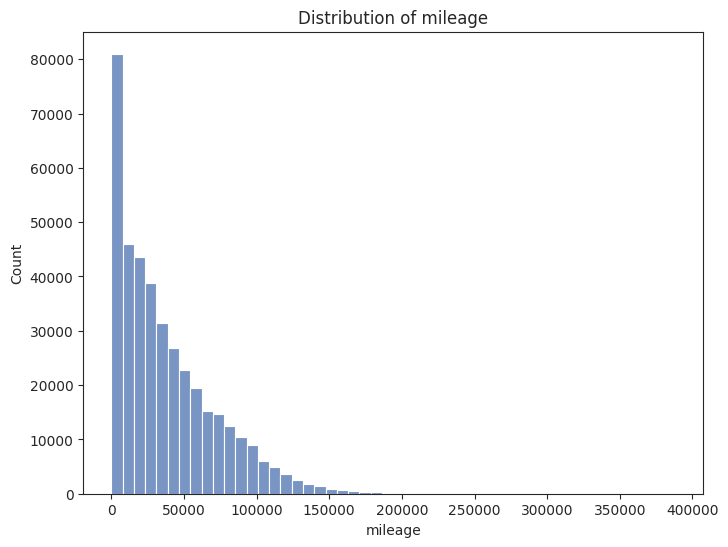

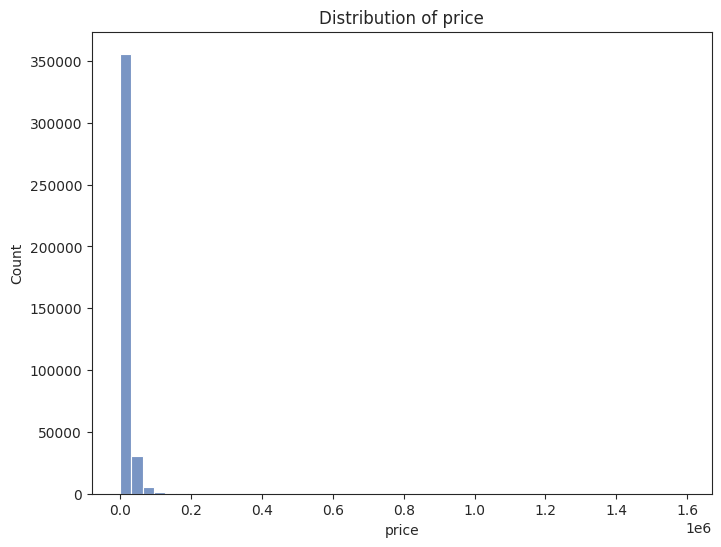

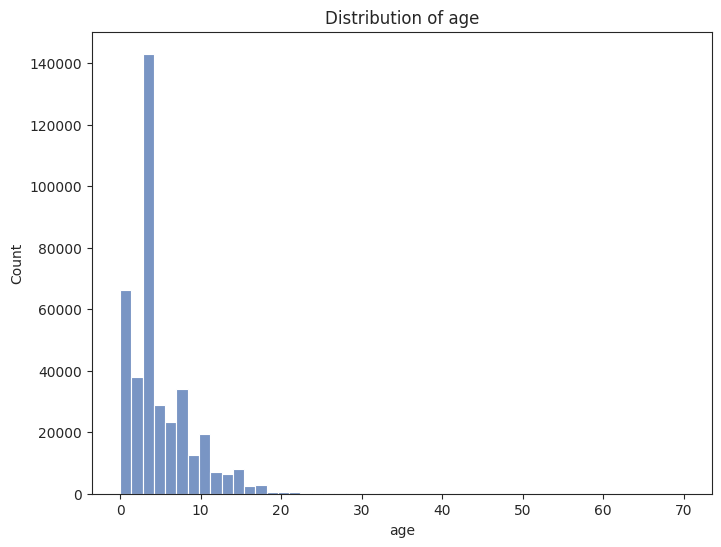

In [11]:
#plotting histograms for numeric distributions
for col in numeric:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

The distributions of mileage, age and price are highly right skewed. However, as we are mostly working with tree based models, we do not need to transform the features  as these models are not sensitive to feature distributions.

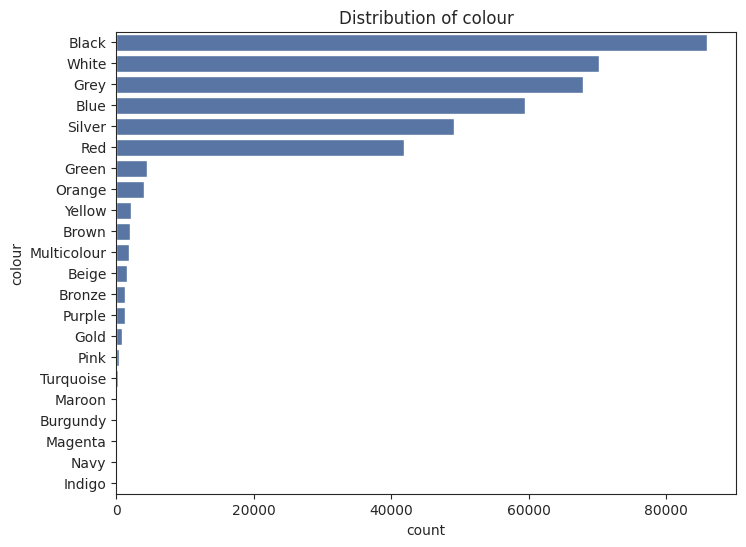

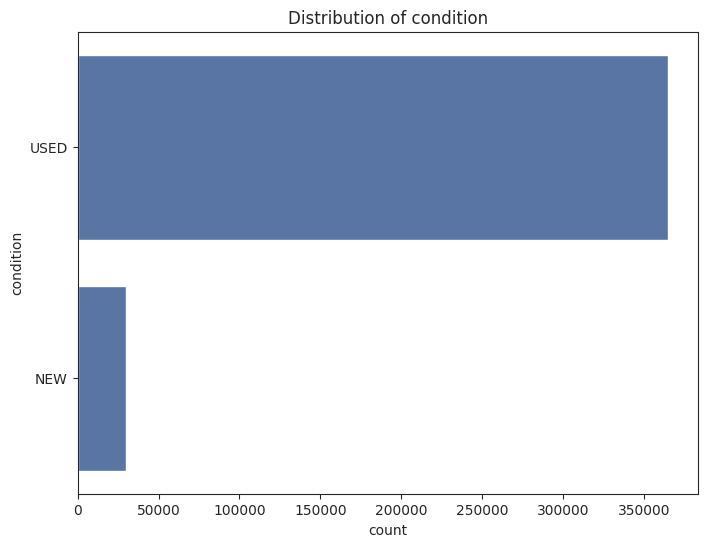

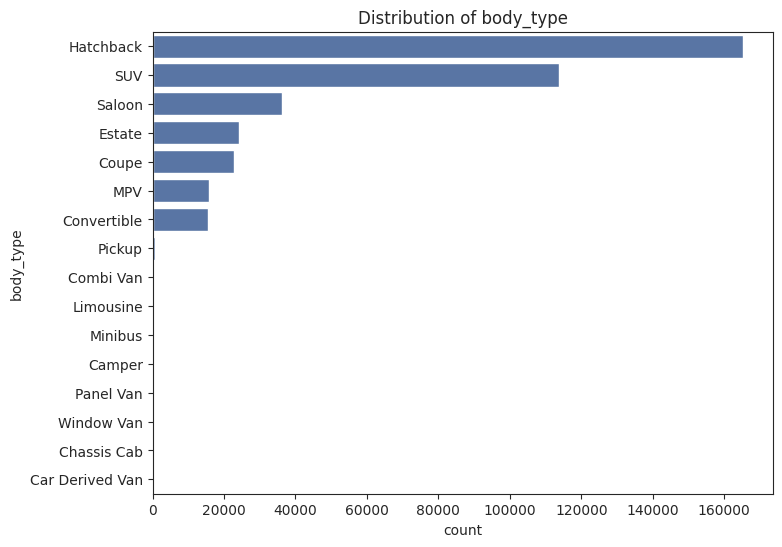

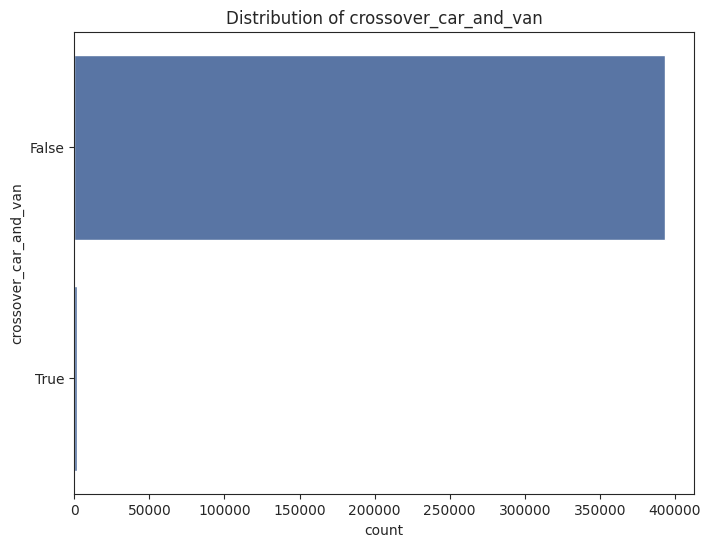

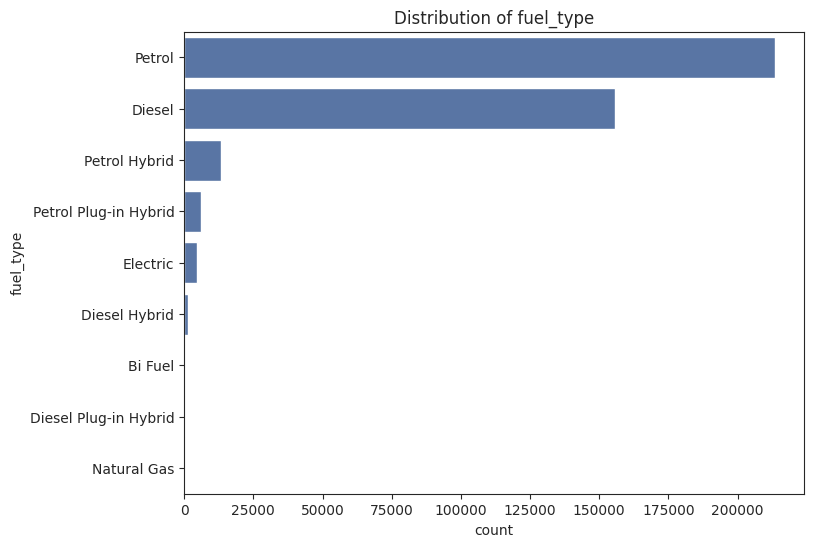

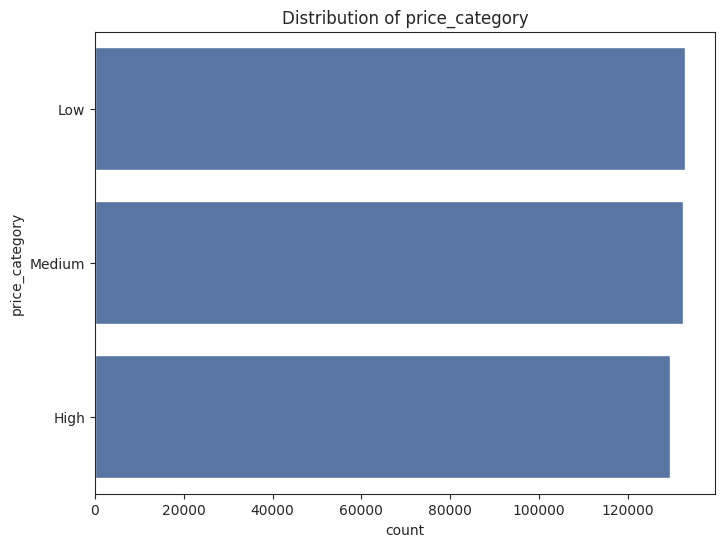

In [12]:
categorical = categorical.drop('make_model')

#plotting countplots for categorical columns
for col in categorical:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

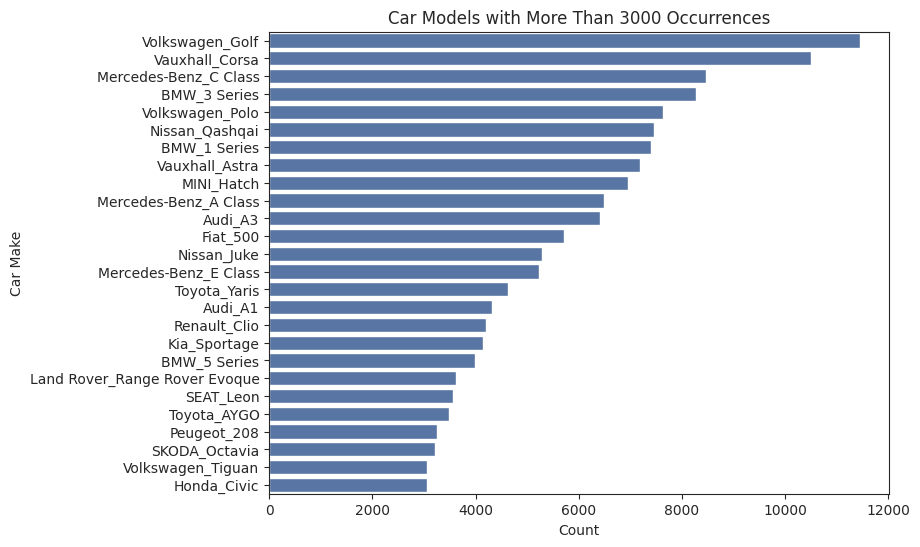

In [13]:
#filtering data to show distribution of standard make
#Calculating value counts for 'standard_make'and storing in a variable
make_counts = df['make_model'].value_counts()

#making a random assumption
#Filtering makes with counts > 3000
filtered_makes = make_counts[make_counts > 3000].index

#Filtering df
filtered_df = df[df['make_model'].isin(filtered_makes)]

#Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, y='make_model', order=filtered_makes)
plt.title('Car Models with More Than 3000 Occurrences')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()

**DATA CLEANING**

In [14]:
df_over200k = df.loc[ df['mileage'] < 200000]
df_over200k

,mileage,colour,condition,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
0,0.0,Grey,NEW,73970,SUV,False,Petrol Plug-in Hybrid,High,Volvo_XC90,4.0
1,108230.0,Blue,USED,7000,Saloon,False,Diesel,Low,Jaguar_XF,9.0
2,7800.0,Grey,USED,14000,SUV,False,Petrol,Medium,SKODA_Yeti,3.0
3,45000.0,Brown,USED,7995,Hatchback,False,Diesel,Low,Vauxhall_Mokka,4.0
4,64000.0,Grey,USED,26995,SUV,False,Diesel,High,Land Rover_Range Rover Sport,5.0
...,...,...,...,...,...,...,...,...,...,...
394882,5179.0,Grey,USED,10595,Hatchback,False,Petrol,Medium,Peugeot_208,1.0
394883,110000.0,Red,USED,2000,Hatchback,False,Petrol,Low,Peugeot_107,11.0
394884,52760.0,White,USED,7250,SUV,False,Petrol,Low,Nissan_Qashqai,8.0
394885,10250.0,Red,USED,11490,Hatchback,False,Petrol,Medium,Abarth_595,5.0


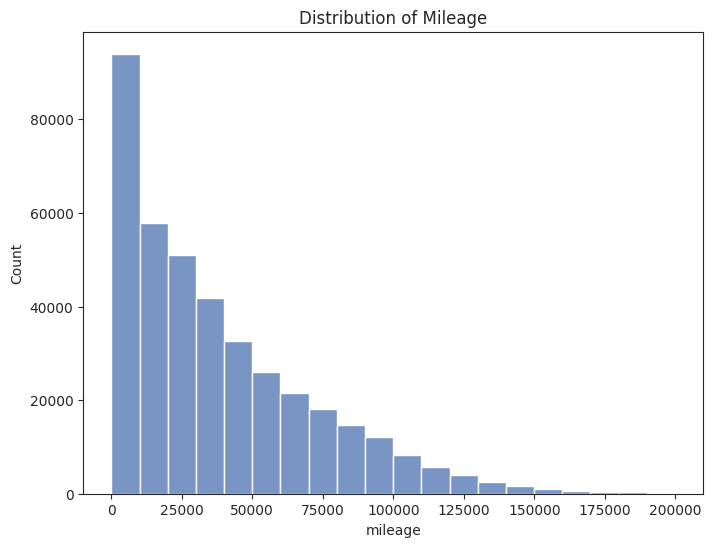

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_over200k, x='mileage', bins=20)
plt.title(f'Distribution of Mileage')
plt.show()

From the Autotrader website, there are no cars that have a mileage greater than 200,000, so we make the assumption that all cars that have a mileage greater than 200,000 are outliers

In [16]:
df = df[df['mileage'] <= 200000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394569 entries, 0 to 394886
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                394569 non-null  float64
 1   colour                 394569 non-null  object 
 2   condition              394569 non-null  object 
 3   price                  394569 non-null  int64  
 4   body_type              394569 non-null  object 
 5   crossover_car_and_van  394569 non-null  bool   
 6   fuel_type              394569 non-null  object 
 7   price_category         394569 non-null  object 
 8   make_model             394569 non-null  object 
 9   age                    394569 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 30.5+ MB


**DATA PREPROCESSING**

In [17]:
#grouping rare categories to reduce impact on models
def rare_categories(df, column, threshold=100):
    value_counts = df[column].value_counts()
    rare_values = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_values else x)
    return df

# Apply to your DataFrame (assumed to be named df)

# Group rare categories and rename columns
df = rare_categories(df, 'colour', threshold=100)

df = rare_categories(df, 'body_type', threshold=100)

df = rare_categories(df, 'fuel_type', threshold=100)

#df = rare_categories(df, 'make_model', threshold=100)

In [18]:
df.head()

,mileage,colour,condition,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
0,0.0,Grey,NEW,73970,SUV,False,Petrol Plug-in Hybrid,High,Volvo_XC90,4.0
1,108230.0,Blue,USED,7000,Saloon,False,Diesel,Low,Jaguar_XF,9.0
2,7800.0,Grey,USED,14000,SUV,False,Petrol,Medium,SKODA_Yeti,3.0
3,45000.0,Brown,USED,7995,Hatchback,False,Diesel,Low,Vauxhall_Mokka,4.0
4,64000.0,Grey,USED,26995,SUV,False,Diesel,High,Land Rover_Range Rover Sport,5.0


Analysis of the predictive Power of Features

In [19]:
# Binning prices into 3 categories: low, medium, high
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

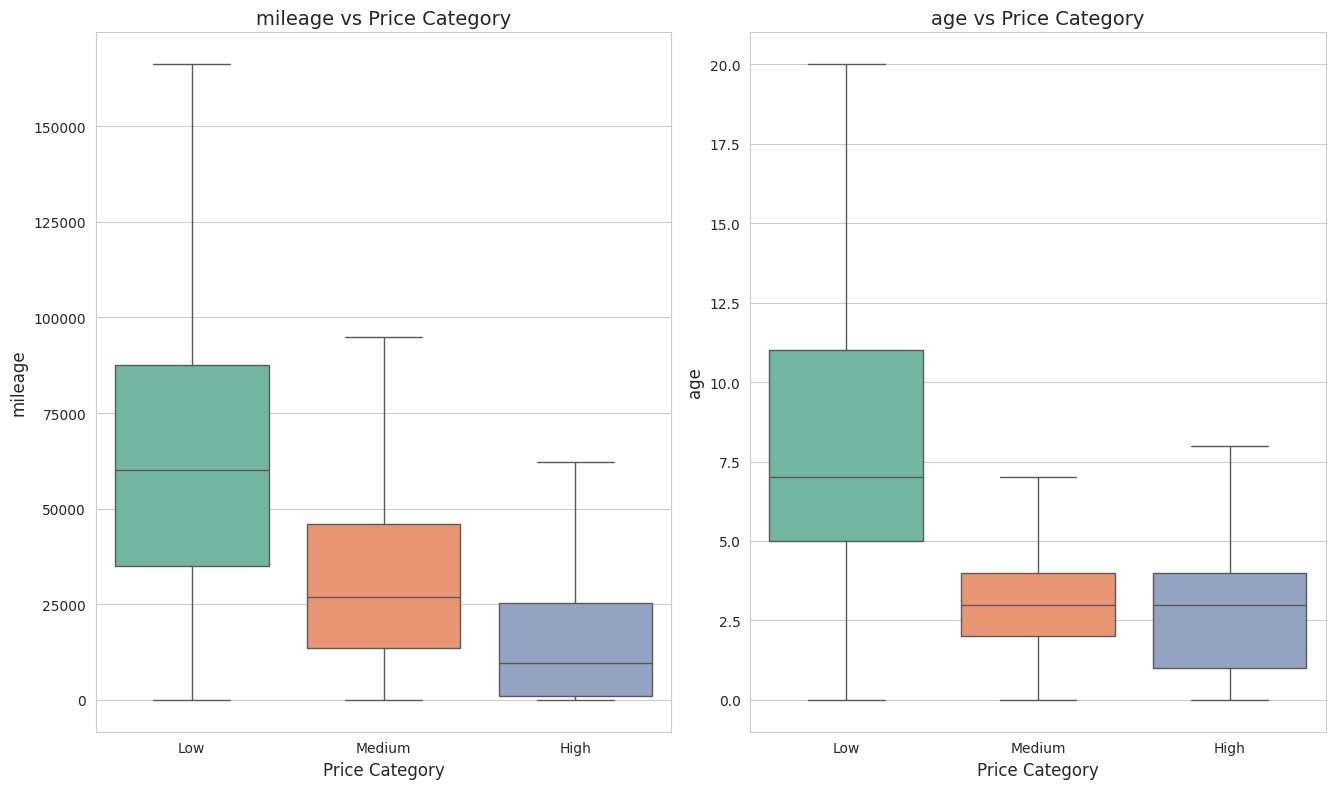

In [20]:
# List of numeric features to plot
features_to_plot = [col for col in numeric if col != 'price']  # exclude 'price' itself
n = len(features_to_plot)

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(20, n * 4))  # Adjusted height

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot((n + 2) // 3, 3, idx)
    sns.boxplot(data=df, x='price_category', y=feature, palette='Set2', showfliers=False)
    plt.title(f'{feature} vs Price Category', fontsize=14)
    plt.xlabel("Price Category", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()

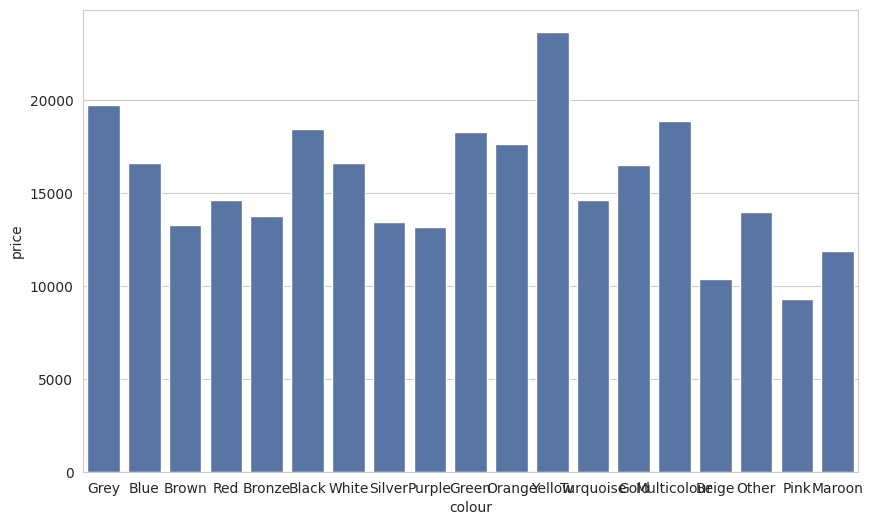

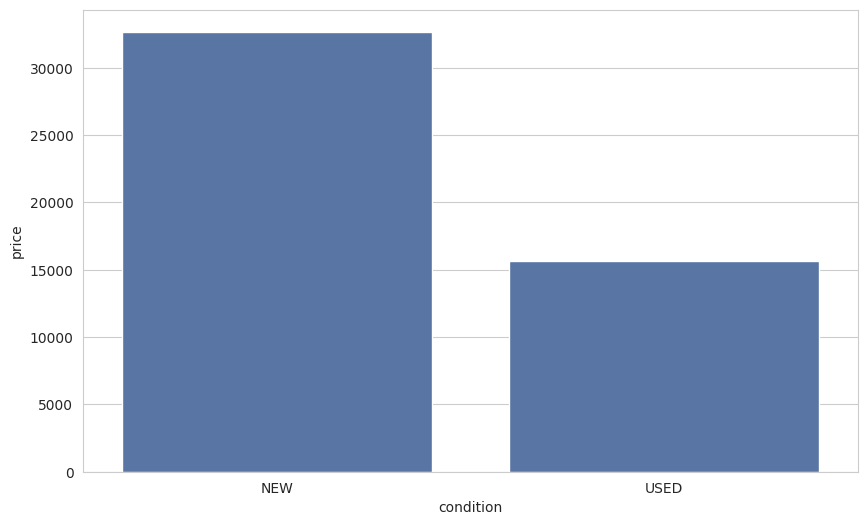

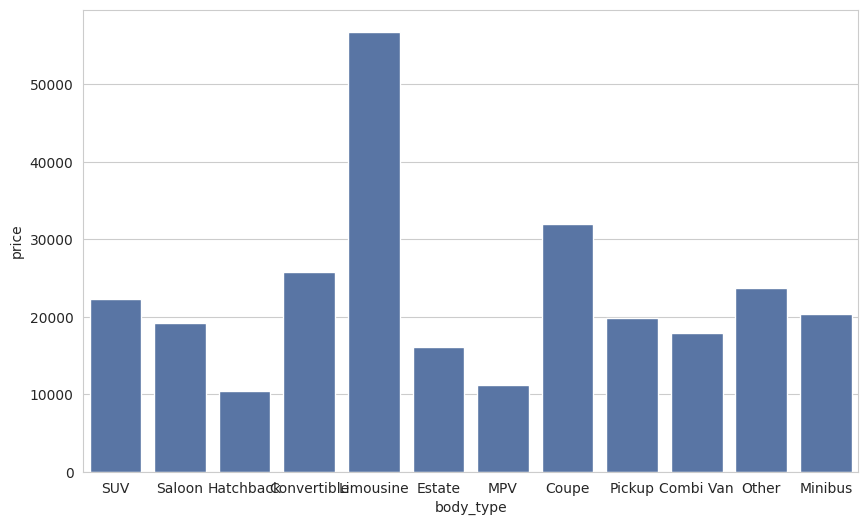

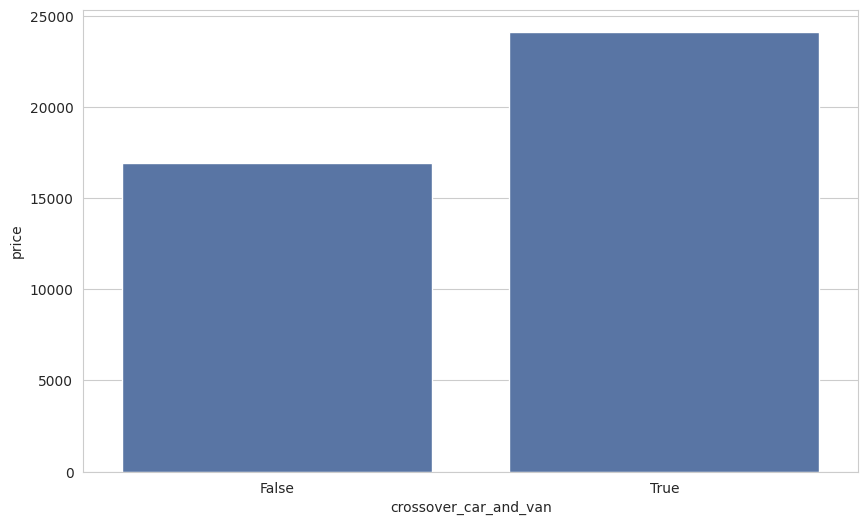

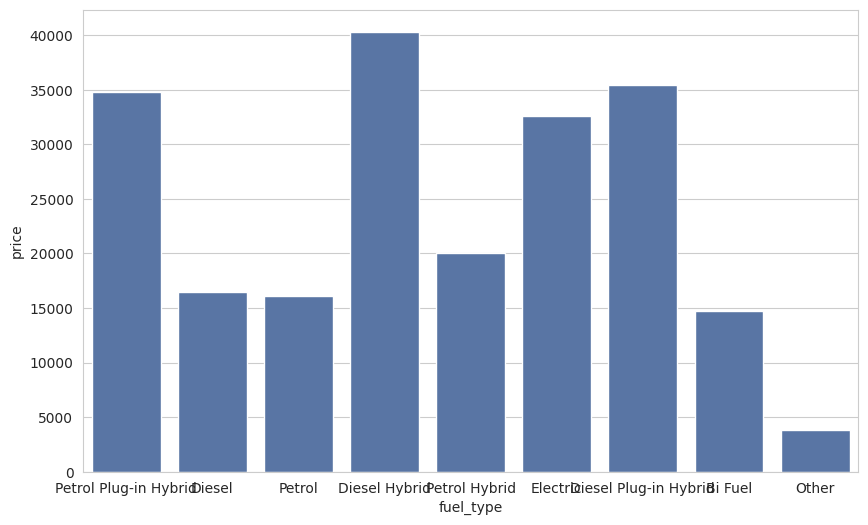

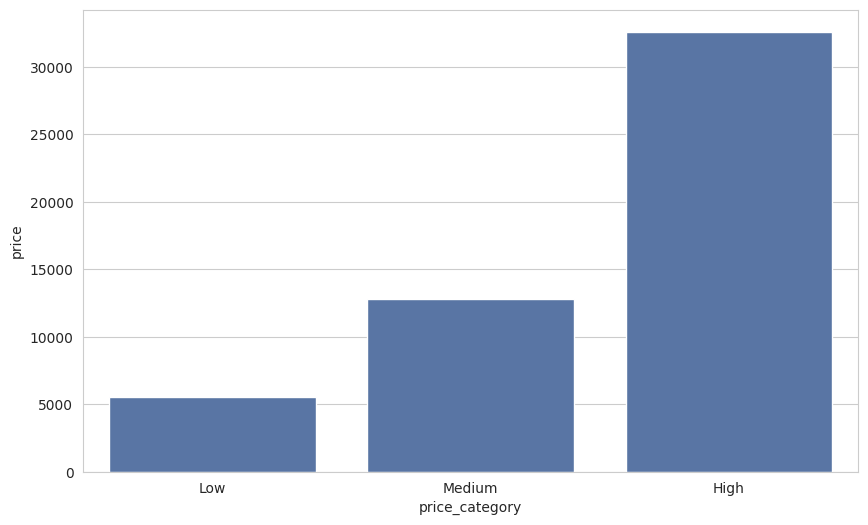

In [21]:
#plotting bar plots to show their relationship with price
for col in categorical:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=col, y='price', ci=None)
    plt.show()

1. Condition
2. Mileage
3. Fuel type
4. Body type
5. Age
6. Color
7. Crossover car and van

In [22]:
df.head()

,mileage,colour,condition,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
0,0.0,Grey,NEW,73970,SUV,False,Petrol Plug-in Hybrid,High,Volvo_XC90,4.0
1,108230.0,Blue,USED,7000,Saloon,False,Diesel,Low,Jaguar_XF,9.0
2,7800.0,Grey,USED,14000,SUV,False,Petrol,Medium,SKODA_Yeti,3.0
3,45000.0,Brown,USED,7995,Hatchback,False,Diesel,Low,Vauxhall_Mokka,4.0
4,64000.0,Grey,USED,26995,SUV,False,Diesel,High,Land Rover_Range Rover Sport,5.0


**AUTOMATED FEATURE SELECTION**

Import Packages and Set Up Environment for Modelling

In [23]:
import sklearn
sklearn.set_config(transform_output="pandas")

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_text

from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import RFECV

import shap
shap.initjs()

Car Price Prediction Pipeline

Sampling for prototyping

In [24]:
#sampling 30% of the dataset for faster loading
df_sampled = df.sample(frac=0.3, random_state = 42)

#shape
print("Sample size:", df_sampled.shape)

Sample size: (118371, 10)


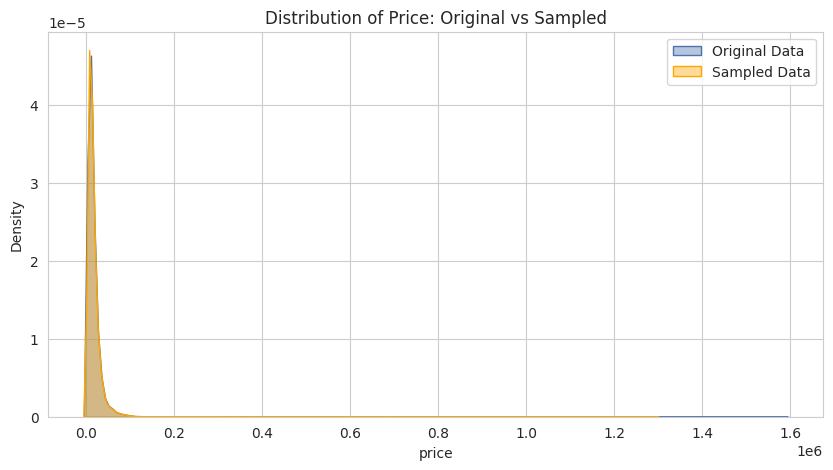

In [25]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'], label='Original Data', fill=True, alpha=0.4)
sns.kdeplot(df_sampled['price'], label='Sampled Data', fill=True, alpha=0.4, color='orange')
plt.legend()
plt.title("Distribution of Price: Original vs Sampled")
plt.show()

There is an almost perfect overlap in the distribution of price in the original dataset and the sampled dataset. This means that the sample preserves the original price distribution well and is representative of the whole dataset.

**Prepare X and y**

In [26]:
X = df_sampled.drop(columns=['price', 'price_category']) #dropping target column and price category
y = df_sampled['price'] #target variable

**Splitting data**

In [27]:
y = np.log1p(y)

In [28]:
#splitting the data, 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,mileage,colour,condition,body_type,crossover_car_and_van,fuel_type,make_model,age
352553,123938.0,Blue,USED,Saloon,False,Diesel,Volvo_S40,13.0
258834,31465.0,White,USED,Hatchback,False,Diesel,BMW_1 Series,3.0
216797,1400.0,Grey,USED,SUV,False,Petrol Hybrid,Volvo_XC90,0.0
327689,26703.0,White,USED,Hatchback,False,Petrol,SKODA_Octavia,2.0
111855,32832.0,Red,USED,SUV,False,Petrol,Mazda_CX-5,7.0


In [29]:
X_train.shape, X_test.shape

((94696, 8), (23675, 8))

**Numeric Features**

In [30]:
#identifying numeric features
#data transformations: incase of missing values impute with mean
#                      scale numeric values to standard normal distribution
numeric_features = X_train.select_dtypes(exclude=['object', 'bool']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print(numeric_features)
numeric_transformer

['mileage', 'age']


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [31]:
#fitting the numeric transformer to the numeric features to impute missing values and scale the values
numeric_transformer.fit_transform(X_train[numeric_features]).head()

,mileage,age
352553,2.545889,2.002154
258834,-0.177184,-0.450061
216797,-1.062515,-1.185726
327689,-0.317412,-0.695283
111855,-0.136929,0.530825


**Categorical Features**

In [32]:
#identifying categorical features
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(target_type='continuous', cv=5, random_state=42))
])

print(categorical_features)
categorical_transformer

['colour', 'condition', 'body_type', 'crossover_car_and_van', 'fuel_type', 'make_model']


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 TargetEncoder(random_state=42, target_type='continuous'))])

In [33]:
#fitting the categorical transformer to the training data
categorical_transformer.fit_transform(X_train[categorical_features], y_train).head()

,colour,condition,body_type,crossover_car_and_van,fuel_type,make_model
352553,9.348140,9.315042,9.568485,9.384742,9.446886,8.045652
258834,9.479695,9.315042,9.011775,9.384742,9.446886,9.327098
216797,9.573641,9.318081,9.804092,9.388020,9.766164,10.379719
327689,9.479695,9.315042,9.011775,9.384742,9.269429,9.343629
111855,9.239584,9.316121,9.804964,9.385207,9.265015,9.732373


**Combining**

In [34]:
#bringing the transformers all together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

**Model Bulding : Without Feature Selection**

In [35]:
#Decision Tree as baseline model
model = DecisionTreeRegressor(random_state=42)

pipeline_noFS = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

**Training the Pipeline**

In [36]:
#fitting the model to the training data
pipeline_noFS.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['colour', 'condition',
                                                   'body_type',
                                                   'crossover_car_and_van',
                                                   'fuel_type',
                                                   'make_model'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

**Predict**

In [37]:
#making predictions
y_pred = pipeline_noFS.predict(X_test)

**Evaluate**

In [38]:
pipeline_noFS.score(X_test, y_test), pipeline_noFS.score(X_train, y_train)

(0.8539539058664968, 0.9134655699515358)

The model explains about 76% of the variance in the training set.
The model explains about 68% of the variance on unseen data. This is stong for a decision tree regressor without any hyperparameter tuning. The model generalizes reasonably well but could be improved

In [39]:
mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, pipeline_noFS.predict(X_train))

(0.22091096466838178, 0.13879944846932182)

On average, the model's predictions on the training set are off by about £2,260, and on the test data, the predictions are off by about £3,438, WHICH IS REASONABLE, BUT THERE IS STILL ROOM FOR IMPROVEMENT, such as feature selection. The model slightly overfits, but this is normal with decision trees.

In [40]:
eval_results = cross_validate(
    pipeline_noFS, X_train, y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std())
)

(np.float64(0.22584783035219896),
 np.float64(0.0037000181245378685),
 np.float64(0.1446377053568217),
 np.float64(0.004534498081644026))

**Initial Features**

In [41]:
#all the features before feature selection
pipeline_noFS['preprocessor'].get_feature_names_out()

array(['num__mileage', 'num__age', 'cat__colour', 'cat__condition',
       'cat__body_type', 'cat__crossover_car_and_van', 'cat__fuel_type',
       'cat__make_model'], dtype=object)

In [42]:
#there are 8 total features
len(pipeline_noFS['preprocessor'].get_feature_names_out())

8

**SelectKBest**

In [43]:
#new pipeline with SelectKBest feature selection
from sklearn.feature_selection import SelectKBest, f_regression

pipeline_KBest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k='all')),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [44]:
#fit the pipeline with feature selection to the training data
pipeline_KBest .fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['colour', 'condition',
                                                   'body_type',
                                                   'crossover_car_and_van',
                                                   'fuel_type',
                                                   'make_model'])])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7c6355f10f40>)),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [45]:
pipeline_KBest['feature_selection'].get_feature_names_out()

array(['num__mileage', 'num__age', 'cat__colour', 'cat__condition',
       'cat__body_type', 'cat__crossover_car_and_van', 'cat__fuel_type',
       'cat__make_model'], dtype=object)

In [46]:
len(pipeline_KBest['feature_selection'].get_feature_names_out())

8

In [47]:
pipeline_KBest['feature_selection'].transform(
    pipeline_KBest['preprocessor'].transform(X_train)
).head()

,num__mileage,num__age,cat__colour,cat__condition,cat__body_type,cat__crossover_car_and_van,cat__fuel_type,cat__make_model
352553,2.545889,2.002154,9.353135,9.3165,9.571480,9.38564,9.450862,7.953374
258834,-0.177184,-0.450061,9.478335,9.3165,9.013313,9.38564,9.450862,9.333772
216797,-1.062515,-1.185726,9.571846,9.3165,9.803745,9.38564,9.764456,10.392936
327689,-0.317412,-0.695283,9.478335,9.3165,9.013313,9.38564,9.267633,9.351169
111855,-0.136929,0.530825,9.235345,9.3165,9.803745,9.38564,9.267633,9.735400


In [48]:
pipeline_KBest.score(X_test, y_test)

0.8539539058664968

In [49]:
mean_absolute_error(y_test, pipeline_KBest.predict(X_test)), mean_absolute_error(y_train, pipeline_KBest.predict(X_train))

(0.22091096466838178, 0.13879944846932182)

In [50]:
eval_results = cross_validate(
    pipeline_KBest, X_train, y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std())
)

(np.float64(0.22584783035219896),
 np.float64(0.0037000181245378685),
 np.float64(0.1446377053568217),
 np.float64(0.004534498081644026))

In [51]:
param_grid = {
    "feature_selection__k": [3, 5, 7, "all"] # How many features to select
}

grid_search = GridSearchCV(
    pipeline_KBest,
    param_grid = param_grid,
    cv = 5,
    scoring='neg_mean_absolute_error',
    return_train_score=True,

)

grid_search.fit(X_train, y_train)

print("Best K:", grid_search.best_params_['feature_selection__k'])
print("Best CV MAE:", -grid_search.best_score_)

Best K: all
Best CV MAE: 0.22584783035219896


In [52]:
best_pipeline = grid_search.best_estimator_

selector = best_pipeline.named_steps['feature_selection']
mask = selector.get_support()

feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

In [53]:
selected_features = feature_names[mask]
print("Selected features:")
for feature in selected_features:
    print("-", feature)

Selected features:
- num__mileage
- num__age
- cat__colour
- cat__condition
- cat__body_type
- cat__crossover_car_and_van
- cat__fuel_type
- cat__make_model


In [54]:
scores = selector.scores_
selected_scores = scores[mask]

# Create a DataFrame of top features and their scores
feature_scores_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': selected_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)

                      Feature          Score
7             cat__make_model  113410.503796
0                num__mileage   64991.563007
1                    num__age   54571.768709
4              cat__body_type   20869.720857
3              cat__condition    8818.697961
6              cat__fuel_type    5464.042396
2                 cat__colour    3616.909432
5  cat__crossover_car_and_van     133.734371


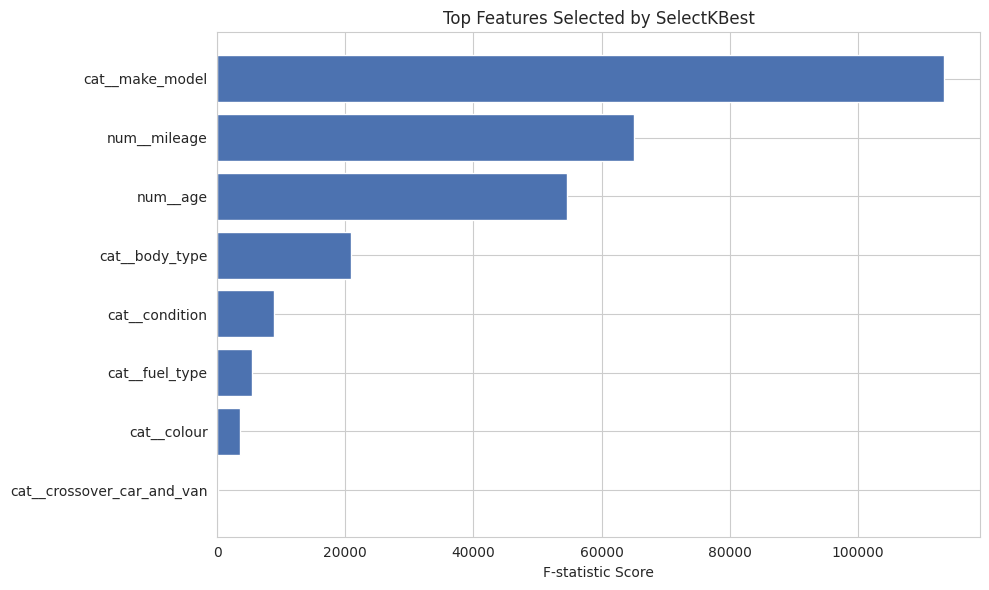

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'])
plt.gca().invert_yaxis()  # So the top feature is at the top
plt.xlabel('F-statistic Score')
plt.title('Top Features Selected by SelectKBest')
plt.tight_layout()
plt.show()

**Recursive Feature Elimination + Cross Validation**

In [56]:
rfecv = RFECV(
    estimator = DecisionTreeRegressor(random_state=42),
    step=1,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

pipeline_rfecv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfecv),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [57]:
pipeline_rfecv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['colour', 'condition',
                                                   'body_type',
                                                   'crossover_car_and_van',
                                                   'fuel_type',
                                                   'make_model'])])),
                ('feature_selection',
                 RFECV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                       n_jobs=-1, scoring='neg_mean_absolute_error')),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [58]:
rfecv_results = cross_validate(
    pipeline_rfecv,
    X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    n_jobs=1
)

print("Mean CV Test MAE:", -rfecv_results['test_score'].mean())
print("Mean CV Train MAE:", -rfecv_results['train_score'].mean())


Mean CV Test MAE: 0.22635058797909463
Mean CV Train MAE: 0.14830064259687803


In [59]:
rfecv_selector = pipeline_rfecv.named_steps['feature_selection']

print("Optimal number of features selected by RFECV:", rfecv_selector.n_features_)

selected_mask = rfecv_selector.get_support()
feature_names = pipeline_rfecv.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_names[selected_mask]

print("Selected features:")
for f in selected_features:
    print("-", f)

Optimal number of features selected by RFECV: 5
Selected features:
- num__mileage
- num__age
- cat__body_type
- cat__fuel_type
- cat__make_model


**Tree Ensembles**

**Pipeline**

In [60]:
# X = df_sampled.drop(columns=['price', 'price_category', 'colour', 'crossover_car_and_van', 'condition']) #dropping target column and price category
# y = df_sampled['price'] #target variable

In [61]:
# y = np.log1p(y)

In [62]:
# #splitting the data, 80% for training and 20% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.head()

In [63]:
# #identifying numeric features
# #data transformations: incase of missing values impute with mean
# #                      scale numeric values to standard normal distribution
# numeric_features = X_train.select_dtypes(exclude=['object', 'bool']).columns.tolist()
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# print(numeric_features)
# numeric_transformer

# #identifying categorical features
# categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', TargetEncoder(target_type='continuous', cv=5, random_state=42))
# ])

# print(categorical_features)
# categorical_transformer

# #bringing the transformers all together
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features),
#     ])

**Decision Tree**

In [64]:
dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=20, random_state=42))
])

In [65]:
dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['colour', 'condition',
                                                   'body_type',
                                                   'crossover_car_and_van',
                                                   'fuel_type',
                                                   'make_model'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=20,
                                       min_samples_split=20,
                                       random_state=42))])

In [66]:
dtr.score(X_test, y_test)

0.8329040188110753

In [67]:
dtr.score(X_train, y_train)

0.8381266176664783

In [68]:
cross_val_score(dtr, X_train, y_train)

array([0.82731135, 0.82621108, 0.83239743, 0.82518821, 0.8282009 ])

In [69]:
scores = cross_val_score(dtr, X_train, y_train)
scores.mean(), scores.std()

(np.float64(0.8278617930600864), np.float64(0.0024844666343229135))

**Random Forest**

In [70]:
rf_regr = RandomForestRegressor(
    n_estimators=1000,
    max_depth=5, min_samples_split=20, min_samples_leaf=20,
    max_features=0.8
)

In [71]:
rfr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_regr)
])

In [72]:
rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['colour', 'condition',
                                                   'body_type',
                                                   'crossover_car_and_van',
                                                   'fuel_type',
                                                   'make_model'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, max_features=0.8,
                                       min_samples_leaf=20,
                                       min_samples_split=20,
                                       n_estimators=1000))])

In [73]:
rfr.score(X_test, y_test)

0.863037785933487

In [74]:
rfr.score(X_train, y_train)

0.8675510735238211

In [75]:
#scores = cross_val_score(rfr, X_train, y_train)
#scores.mean(), scores.std()

#(np.float64(0.7110681719192062), np.float64(0.06421222289990017))

**Feature Importance**

In [76]:
rfr['regressor'].feature_importances_

array([1.01924301e-01, 4.44269118e-01, 6.34227176e-06, 2.97940492e-03,
       3.60151795e-02, 0.00000000e+00, 1.30881670e-03, 4.13496838e-01])

In [77]:
rfr['regressor'].feature_names_in_

array(['num__mileage', 'num__age', 'cat__colour', 'cat__condition',
       'cat__body_type', 'cat__crossover_car_and_van', 'cat__fuel_type',
       'cat__make_model'], dtype=object)

In [78]:
def plot_est_feat_imp_barh(est, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()

    return pd.Series(
        est.feature_importances_,
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

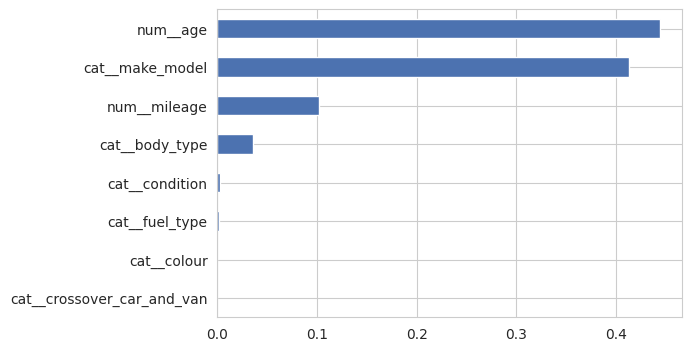

In [79]:
plot_est_feat_imp_barh(rf_regr, rf_regr.feature_names_in_);

**Ensemble of Trees**

**Gradient Boosting Regressor**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
# gbr_model = GradientBoostingRegressor(
#     n_estimators = 1000,
#     learning_rate = 0.1,
#     max_depth = 5,
#     min_samples_split = 20,
#     min_samples_leaf = 20,
#     random_state = 42
# )

# gbr = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', gbr_model)
# ])

# gbr.fit(X_train, y_train)

# gbr.score(X_train, y_train), gbr.score(X_test, y_test)

In [82]:
#scores = cross_val_score(gbr, X_train, y_train)
#scores.mean(), scores.std()

#(np.float64(0.7392455837653346), np.float64(0.06450526178242914))

In [83]:
#models = [gbr, rfr, dtr]

In [84]:
# model_results = []
# for model in models:
#     eval_results = cross_validate(
#         model, X, y, cv=5,
#         scoring='neg_mean_absolute_error',
#         return_train_score=True
#     )
#     model_results.append(
#         (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
#          -eval_results['train_score'].mean(), eval_results['train_score'].std())
#     )

In [85]:
#model_results

In [86]:
# for est in models:
#     est.fit(X_train, y_train)

In [87]:
# ensemble = VotingRegressor(
#     [
#         ("gb", gbr),
#         ("rf", rfr),
#         ('dtr', dtr)
#     ]
# )
# ensemble.fit(X_train, y_train)

In [88]:
# eval_results = cross_validate(
#     ensemble, X, y, cv=5,
#     scoring='neg_mean_absolute_error',
#     return_train_score=True
# )
# ensemble_result = (
#     -eval_results['test_score'].mean(), eval_results['test_score'].std(),
#     -eval_results['train_score'].mean(), eval_results['train_score'].std()
# )

In [89]:
# model_results = pd.DataFrame(
#   model_results,
#   columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
#   index=['gbr', 'rfr', 'dtr']
# )

In [90]:
#model_results.loc['ensemble'] = ensemble_result

In [91]:
#model_results

In [92]:
# xt = X.head(20)
# yt = y.head(20)
# pred_gbr = gbr.predict(xt)
# pred_rfr = rfr.predict(xt)
# pred_dtr = dtr.predict(xt)
# pred_ens = ensemble.predict(xt)

In [93]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
# ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
# ax.plot(pred_dtr, "ys--", alpha=0.5, label="dtr")
# ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
# ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

# ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
# ax.set_ylabel("predicted")
# ax.set_xlabel("training samples")
# ax.legend(loc="best")
# ax.set_title("Regressor predictions and their average");

In [94]:
from xgboost import XGBRegressor

# Define the XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=20,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Fit model
xgb.fit(X_train, y_train)

# Evaluate
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.9311082713351677, 0.9224493196372253)

In [95]:
scores = cross_val_score(xgb, X_train, y_train)
scores.mean(), scores.std()

(np.float64(0.9172945949760554), np.float64(0.0025278314264407836))

**Permutation Importance**

In [96]:
# from sklearn.inspection import permutation_importance

# perm_importance = permutation_importance(
#     rfr, X_test, y_test, n_repeats=30, random_state=42, scoring='r2'
# )

# perm_importance_df = pd.DataFrame(
#     dict(
#         feature=X_test.columns,
#         pi_mean=perm_importance['importances_mean'],
#         pi_std=perm_importance['importances_std']
#     )
# )

In [97]:
#perm_importance_df

In [98]:
# perm_importance_df_sorted = perm_importance_df.sort_values(by='pi_mean', ascending=True)
# perm_importance_df_sorted

In [99]:
# # Visualisation Option 1: Error Bars
# fig, ax = plt.subplots(figsize=(8, 6))

# ax.errorbar(
#     perm_importance_df_sorted['pi_mean'],
#     perm_importance_df_sorted['feature'],
#     xerr=perm_importance_df_sorted['pi_std'],
#     fmt='o', color='black',
#     ecolor='lightgray', elinewidth=3, capsize=0
# )

# ax.set_ylabel('Feature')
# ax.set_xlabel('Permutation Importance Mean');

**DIMENSIONALITY REDUCTION, LINEAR**

In [100]:
from sklearn.decomposition import PCA

In [101]:
df.head()

,mileage,colour,condition,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
0,0.0,Grey,NEW,73970,SUV,False,Petrol Plug-in Hybrid,High,Volvo_XC90,4.0
1,108230.0,Blue,USED,7000,Saloon,False,Diesel,Low,Jaguar_XF,9.0
2,7800.0,Grey,USED,14000,SUV,False,Petrol,Medium,SKODA_Yeti,3.0
3,45000.0,Brown,USED,7995,Hatchback,False,Diesel,Low,Vauxhall_Mokka,4.0
4,64000.0,Grey,USED,26995,SUV,False,Diesel,High,Land Rover_Range Rover Sport,5.0


In [102]:
df_sub = df.sample(n=500, random_state=42).copy()
df_sub

y = df_sub['price']
X = df_sub.drop(['price', 'price_category'], axis=1)

In [104]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()


for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
mean_series = X_scaled.mean(axis=0)
var_series = X_scaled.var(axis=0, ddof=0)  # Population variance like np.var(..., ddof=0)

summary_df = pd.DataFrame({
    'Mean': mean_series,
    'Variance': var_series
})

print(summary_df)

                               Mean  Variance
mileage                7.638334e-17       1.0
colour                -6.306067e-17       1.0
condition             -1.119105e-16       1.0
body_type              2.131628e-17       1.0
crossover_car_and_van  0.000000e+00       0.0
fuel_type             -1.421085e-16       1.0
make_model            -1.163514e-16       1.0
age                    4.973799e-17       1.0


In [106]:
#Apply PCA
pca_all = PCA(n_components=None)
X_pca_all = pca_all.fit_transform(X_scaled)

In [107]:
#get explained variance for each component
explained_variance = pca_all.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [108]:
#print explained variance
print("Explained variance for 8 components:")
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {ev:.3f} ({cv:.3f})")

Explained variance for 8 components:
PC1: 0.261 (0.261)
PC2: 0.186 (0.446)
PC3: 0.160 (0.606)
PC4: 0.138 (0.743)
PC5: 0.120 (0.863)
PC6: 0.104 (0.967)
PC7: 0.033 (1.000)
PC8: 0.000 (1.000)


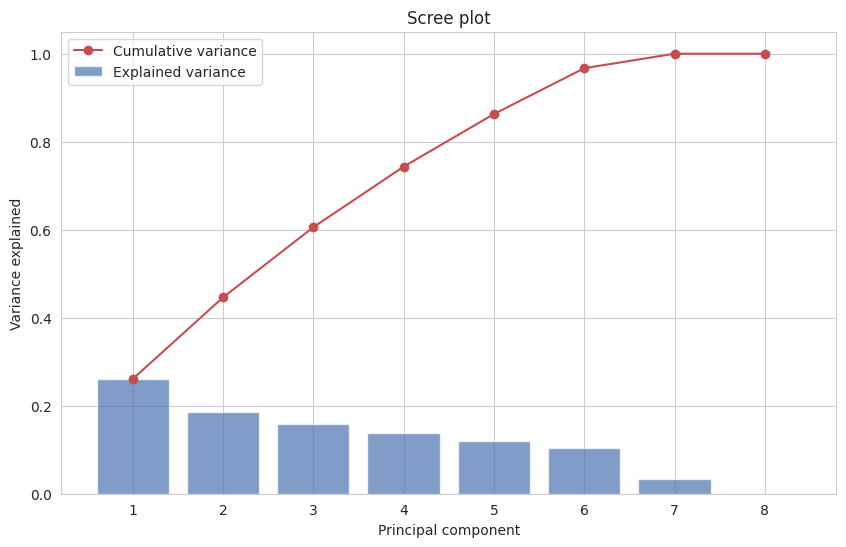

In [109]:
#Scree Plot(variance visualisation)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 9), explained_variance, alpha=0.7, label='Explained variance')
plt.plot(range(1, 9), cumulative_variance, 'ro-', label='Cumulative variance')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.title('Scree plot')
plt.xticks(range(1, 9))
plt.legend()
plt.grid(True)
plt.show()

In [110]:
#Project data onto 2 components so we can visualize it
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca['price'] = y

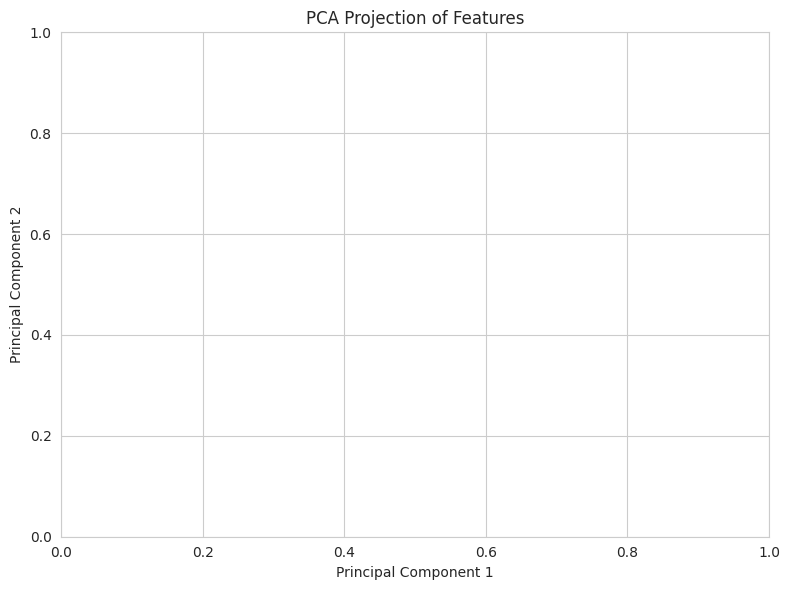

In [111]:
#plotting the reduced data
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='price', data=df_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Features')
plt.tight_layout()
plt.show()

In [112]:
#Try 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

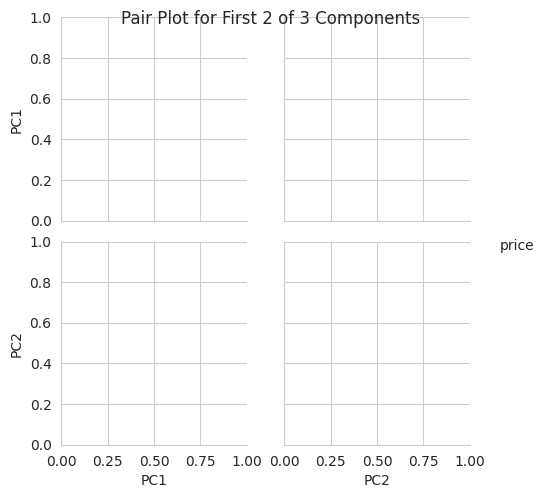

In [113]:
df_pca_3d = pd.DataFrame(X_pca_3d.iloc[:, :2], columns=['PC1', 'PC2'])
df_pca_3d['price'] = y
sns.pairplot(df_pca_3d, hue='price', palette='viridis')
plt.suptitle('Pair Plot for First 2 of 3 Components')
plt.show();

**NON LINEAR DIMENSIONALITY REDUCTION**

In [114]:
df_sample = df.sample(n=500, random_state=42).copy()
df_sample

,mileage,colour,condition,price,body_type,crossover_car_and_van,fuel_type,price_category,make_model,age
290266,9856.0,White,USED,18145,Coupe,False,Petrol,High,BMW_4 Series,2.0
379226,31285.0,Blue,USED,7455,Hatchback,False,Petrol,Low,Nissan_Pulsar,6.0
149855,49000.0,Red,USED,12490,Hatchback,False,Diesel,Medium,Volkswagen_Golf,6.0
128570,0.0,White,NEW,16888,Hatchback,False,Diesel,Medium,Renault_Clio,4.0
157809,33341.0,Red,USED,9350,Hatchback,False,Diesel,Medium,MINI_Hatch,7.0
...,...,...,...,...,...,...,...,...,...,...
28783,53298.0,Silver,USED,11290,SUV,False,Petrol,Medium,Mazda_CX-5,6.0
320437,67000.0,Grey,USED,7995,Saloon,False,Petrol,Low,MG_ZT,14.0
97472,23344.0,Blue,USED,13100,Hatchback,False,Petrol,Medium,Volkswagen_Golf,3.0
121166,10824.0,Black,USED,18800,SUV,False,Petrol,High,Kia_Sportage,2.0


In [115]:
y_sample = df_sample['price']
df_sample = df_sample.drop(['price', 'price_category'], axis=1)


In [116]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df_sample.select_dtypes(include='object').columns
le = LabelEncoder()


for col in categorical_cols:
    df_sample[col] = le.fit_transform(df_sample[col])

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(df_sample)

**PCA(Baseline)**

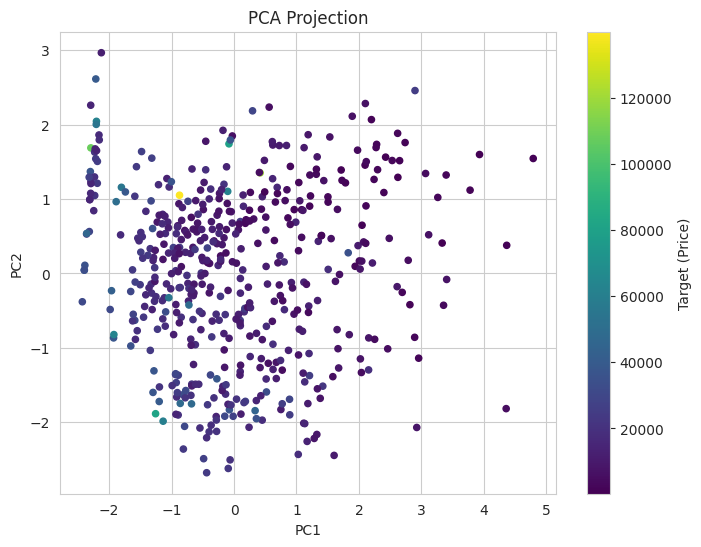

In [117]:
from sklearn.decomposition import PCA

#apply PCA function
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample_scaled)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca.iloc[:,0], X_pca.iloc[:,1], c=y_sample, cmap='viridis', s=20)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target (Price)')
plt.show()

#print(X_pca)

**MDS**

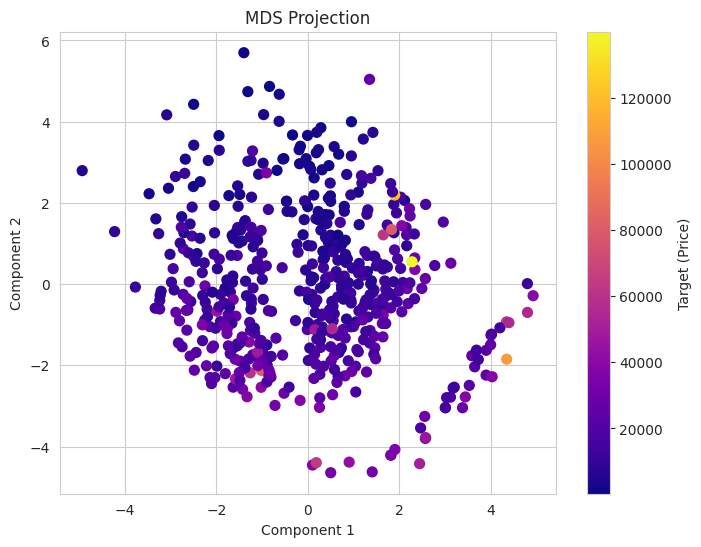

In [118]:
from sklearn.manifold import MDS, Isomap, TSNE

#apply mds
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_sample_scaled)

#plot mds results
plt.figure(figsize=(8,6))
plt.scatter(X_mds[:,0], X_mds[:,1], c=y_sample, cmap='plasma', s=50)
plt.title('MDS Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target (Price)')
plt.show()

**Isomap**

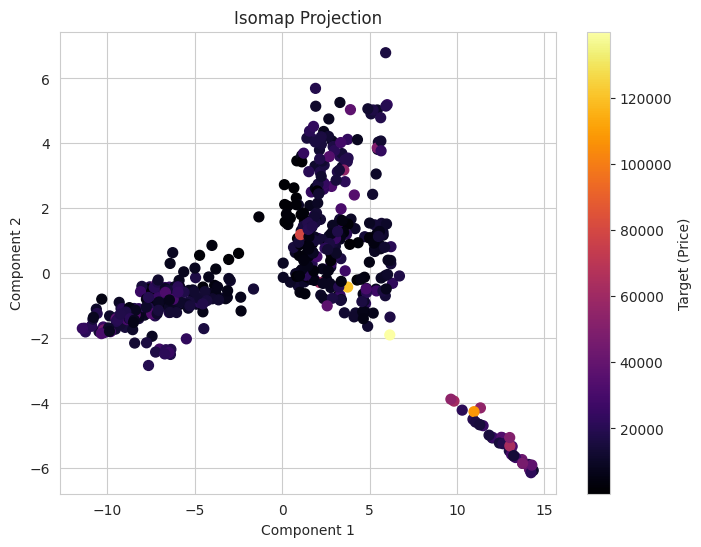

In [119]:
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_sample_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_isomap.iloc[:,0], X_isomap.iloc[:,1], c=y_sample, cmap='inferno', s=50)
plt.title('Isomap Projection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target (Price)')
plt.show()

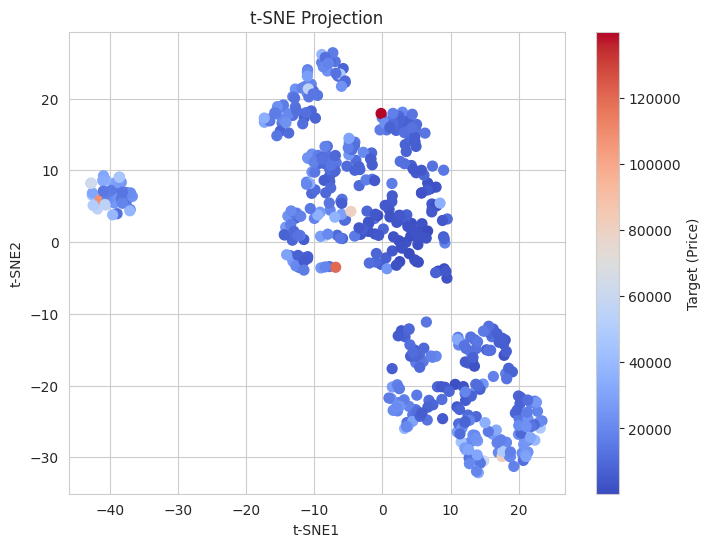

In [120]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne.iloc[:,0], X_tsne.iloc[:,1], c=y_sample, cmap='coolwarm', s=50)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar(label='Target (Price)')
plt.show()

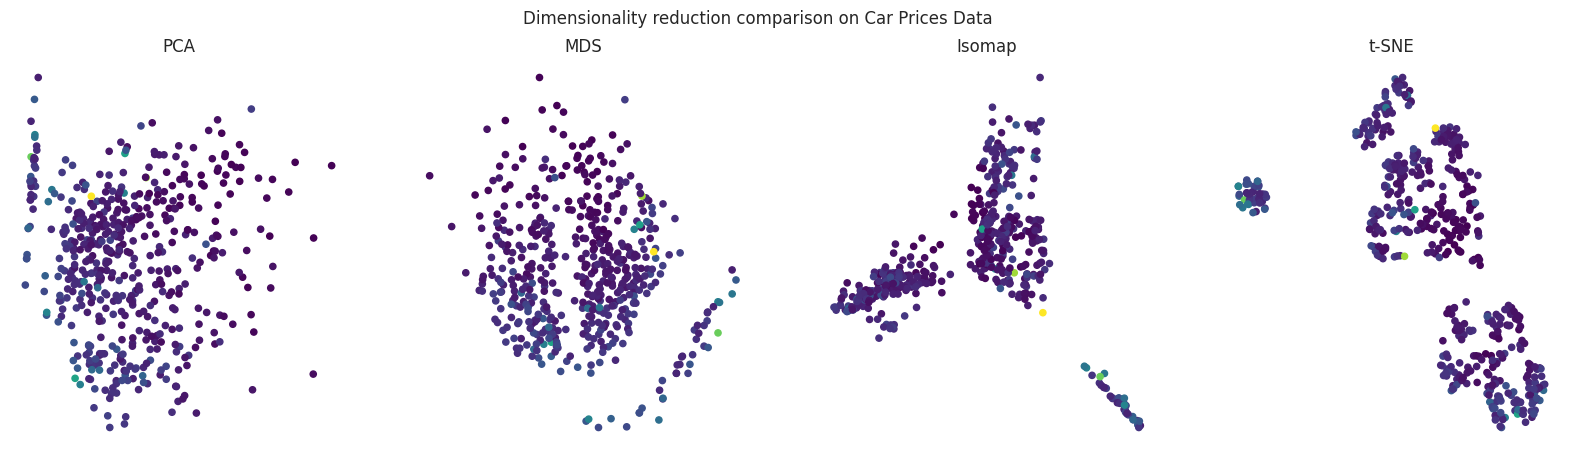

In [121]:
# Plot all methods
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
titles = ['PCA', 'MDS', 'Isomap', 't-SNE']
embeddings = [X_pca, X_mds, X_isomap, X_tsne]

embeddings = [np.asarray(embed) for embed in [X_pca, X_mds, X_isomap, X_tsne]]

for i in range(4):
    ax[i].scatter(embeddings[i][:, 0], embeddings[i][:, 1], c=y_sample, cmap='viridis', s=20)
    ax[i].set_title(titles[i])
    ax[i].axis('off')  # Hide axes for clarity
plt.suptitle("Dimensionality reduction comparison on Car Prices Data ")
plt.show()

**POLYNOMIAL REGRESSION**

In [122]:
X = df_sampled.drop(columns=['price', 'price_category']) #dropping target column and price category
y = df_sampled['price'] #target variable

In [123]:
y = np.log1p(y)

In [124]:
#splitting the data, 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,mileage,colour,condition,body_type,crossover_car_and_van,fuel_type,make_model,age
352553,123938.0,Blue,USED,Saloon,False,Diesel,Volvo_S40,13.0
258834,31465.0,White,USED,Hatchback,False,Diesel,BMW_1 Series,3.0
216797,1400.0,Grey,USED,SUV,False,Petrol Hybrid,Volvo_XC90,0.0
327689,26703.0,White,USED,Hatchback,False,Petrol,SKODA_Octavia,2.0
111855,32832.0,Red,USED,SUV,False,Petrol,Mazda_CX-5,7.0


In [125]:
X_train.shape, X_test.shape

((94696, 8), (23675, 8))

In [126]:
#identifying numeric features
#data transformations: incase of missing values impute with mean
#scale numeric values to standard normal distribution
numeric_features = X_train.select_dtypes(exclude=['object', 'bool']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print(numeric_features)
numeric_transformer

#identifying categorical features
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(target_type='continuous', cv=5, random_state=42))
])

print(categorical_features)
categorical_transformer

#bringing the transformers all together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

['mileage', 'age']
['colour', 'condition', 'body_type', 'crossover_car_and_van', 'fuel_type', 'make_model']


**Linear Regression**

In [127]:
# Fit linear regression
model = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

In [128]:
# Predict on the test set
pipeline.fit(X_train, y_train)
y_pred_lr = pipeline.predict(X_test)

In [129]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
#

Linear Regression - MSE: 0.1147, R²: 0.8418


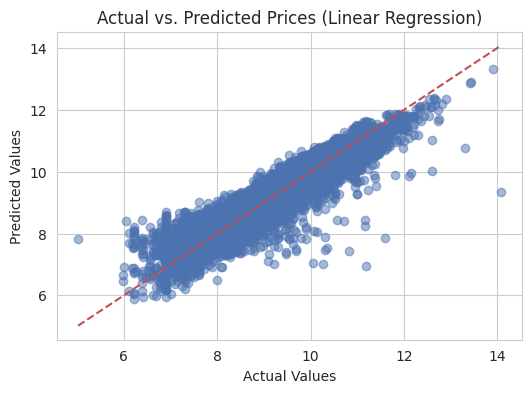

In [130]:
# Plot Actual vs predicted values
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

**Polynomial Regression**

Polynomial Regression (degree=2) - MSE: 0.0816, R²: 0.8875



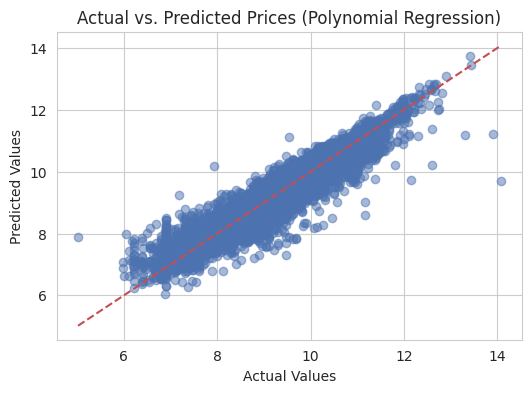

In [131]:
#Add polynomial features (degree=2)
model = LinearRegression()

pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('regressor', model)
])

#Fit Linear Regression
pipeline_poly.fit(X_train, y_train)

#Predict on the test set
y_pred_poly = pipeline_poly.predict(X_test)

#Evaluate model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
print()

#Plot actual vs predicted values
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Prices (Polynomial Regression)")
plt.show()